# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [11]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

# get some sense of the data
print
print "mean"
print data.mean()
print 
print "std"
print data.std()


Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185

mean
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

std
Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: a vector of weights might show up.  Each element of the vector corresponding to one of 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', and 'Delicatessen'. Something like [.9 .01 .01 .7 .01] would mean that 'Fresh' (0.9) and 'Frozen' (0.7) are along the same dimension and are two 'flavors' of the same characteristic.

###PCA

In [12]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

print '-- verify inverse transform of scaling with first vector'
print scaler.fit_transform(data).shape
print scaler.inverse_transform([[ 5.29331898e-02, 5.23567773e-01, -4.11148934e-02, -5.89367156e-01, -4.35687319e-02, -6.63390575e-02]])
print '--'
print '-- verify scaled data looks scaled'
print 'min, expect <0', scaled_data.min(axis=0)
print 'max, expect >0', scaled_data.max(axis=0)
print (scaled_data.max(axis=0)-scaled_data.min(axis=0))
print 'mean, expect near 0', scaled_data.mean(axis=0)
print 'std, expect near 1', scaled_data.std(axis=0)
print '--'


from sklearn.decomposition import PCA
n_columns = data.shape[1]
print 'number of columns (will use for number of components)', n_columns
pca = PCA(n_components=n_columns)
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print "components_"
print pca.components_
print "explained_variance_ratio_"
print pca.explained_variance_ratio_


n_columns = scaled_data.shape[1]
print n_columns
scaled_pca = PCA(n_components=n_columns)
scaled_pca.fit(scaled_data)

# Print the components and the amount of variance in the data contained in each dimension
print "components_"
print scaled_pca.components_
print "explained_variance_ratio_"
print scaled_pca.explained_variance_ratio_

-- verify inverse transform of scaling with first vector
(440, 6)
[[ 12668.99999988   9655.99999839   7561.00000035    213.99999891
    2674.00000002   1338.00000005]]
--
-- verify scaled data looks scaled
min, expect <0 [-0.94968309 -0.77879505 -0.83733437 -0.62834303 -0.60441648 -0.54026439]
max, expect >0 [  7.92773757   9.18364979   8.93652831  11.91900152   7.96767199
  16.47844745]
[  8.87742066   9.96244484   9.77386267  12.54734455   8.57208847
  17.01871184]
mean, expect near 0 [ -3.43159844e-17   0.00000000e+00  -4.03717464e-17   3.63345717e-17
   2.42230478e-17  -8.07434927e-18]
std, expect near 1 [ 1.  1.  1.  1.  1.  1.]
--
number of columns (will use for number of components) 6
components_
[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: 
Normally one would like to scale the data so one can compare dimensions of different units.  This data set is all in dollar amounts, so that purpose of scaling is removed.  However without scaling, it is possible that the relatively costliness of one dimension will hide some important distiction between groups of buyers.  So I've chosen to look at both scaled and raw data.

For the raw data, the first two component factors, 0.4596 and 0.4052 are similar, but then the third factor drops by a factor of between 5 and 6 to 0.0700. The fourth factor is down by and order of magnitude to 0.044.  I would include the first two dimensions, perhaps the third but no more.

For the scaled data, an order of magnitude data drop isn't seen until the 5th component,  I would include the first 4 with the scaled data.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer:
Raw --
The first principle component ( [-0.98 -0.12 -0.06 -0.15  0.01 -0.07] )is made up most strongly of the 'Fresh' dimension.  This isn't too surprising, 'Fresh' has the greatest min to max range, and the largest standard deviation, so one would expect without scaling, this feature to dominate the variance.
The second principle component ( [-0.11  0.52  0.76 -0.02  0.37  0.06] ) is made up most stongly of 'Grocery','Milk', and 'Detergent_Paper' in that order

Scaled --
The first principle component ( [-0.04 -0.55 -0.58 -0.05 -0.55 -0.25] ) is 'Milk','Grocery','Detergents_Paper', which was the makeup of the second component in the Raw case.
The second principle component ( [-0.53 -0.08  0.15 -0.61  0.26 -0.50] ) is 'Frozen','Fresh','Delicatessen'

###ICA

In [13]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA

ica = FastICA(n_components=2)
S_data = ica.fit_transform(scaled_data)


# Print the independent components
print ica.components_

[[-0.01884683 -0.00746648  0.00027704 -0.02183503  0.00435515 -0.01973518]
 [ 0.00429207 -0.01445054 -0.01779682  0.00492655 -0.01807304 -0.0017374 ]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 
Even though ICA is a different approact, one of minimizine mutal information, and does not require generating orthogonal basis, the results are similar to the PCA analysis.  

Again of dimension of 
[ 0.00  -0.01  -0.02  0.00 -0.02  -0.00] 'Detergents_Paper','Grocery', 'Milk'

And one of 
[ 0.02  0.01 -0.00  0.02  -0.00  0.02] 'Frozen', 'Deli', 'Fresh'

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 

K Means clustering --
  computationally faster,
  tighter clusters
  
Gaussian Mixture Models -- 
  soft classification is available
  

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [14]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [15]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation

# a subroutine to work back from the mapping to PCAs
# will only result in orginal values if n_components == n_features
def revert(E,scaler,pca):
    Ep = np.dot(E,pca.components_)+ pca.mean_
    return scaler.inverse_transform(Ep)

p = PCA(n_components=2)


reduced_data = p.fit_transform(scaled_data)
print reduced_data[:4]


[[-0.19329055  0.30509996]
 [-0.4344199   0.32841262]
 [-0.81114323 -0.8150957 ]
 [ 0.77864783 -0.65275373]]


In [16]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

clusters = KMeans(n_clusters=4,random_state=0).fit(reduced_data)
#For GMM clusters = GMM(n_components=5,covariance_type='full').fit(reduced_data)
print clusters
print clusters.predict(reduced_data)[:4]



KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=0, tol=0.0001,
    verbose=0)
[0 3 3 0]


In [17]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [22]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = clusters.cluster_centers_
# For GMM centroids = clusters.means_
print 'centroids'
print centroids

print
print 'revert of centroids'
print revert(centroids, scaler, p)

print
print 'revert of unit vecotrs'
print revert([[-1,0],[0,-1]], scaler, p)

centroids
[[  0.68468443  -0.15620376]
 [ -7.05027932   0.63634999]
 [ -4.51308525 -10.04070335]
 [ -1.30128824   0.73156912]]

revert of centroids
[[ 12671.14525369   3140.56024245   3969.92306418   3364.99444933
     902.63651133   1267.09698252]
 [ 11575.75815148  33738.3964026   47599.73788995   2935.70615055
   22076.40574756   5559.86842825]
 [ 81410.12439235  30088.63313126  18842.85798626  33954.61886688
    2468.7786494   18947.15792161]
 [  7826.18890799  10577.09565724  16120.904093     1226.43742289
    7170.82509551   1397.3906357 ]]

revert of unit vecotrs
[[ 12542.04853846   9814.8703078   13449.78573957   3320.15314427
    5494.35554418   2225.38258907]
 [ 18669.6371861    6409.37664264   6564.55602068   6036.11091952
    1665.96228909   2945.17100374]]


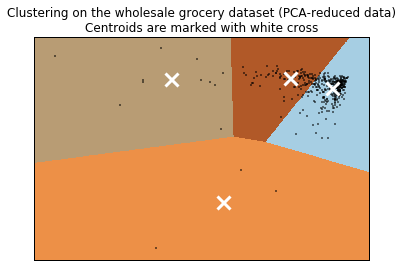

In [23]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 
```

 [  0.68468443  -0.15620376]  blue
 [ -7.05027932   0.63634999]  light brown
 [ -4.51308525 -10.04070335]  orange
 [ -1.30128824   0.73156912]  dark brown
```
```
  fresh   milk  grocery frozen paper  deli
[ 12671   3141    3970   3365   903   1267] blue
[ 11576  33738   47600   2936 22076   5560] light brown
[ 81410  30089   18843  33955  2469  18947] orange
[  7826  10577   16121   1226  7171   1397] dark brown
```

blue -- smaller business, mainly fresh foods, probably less infrastruce refrigeration/freezer 

light brown -- larger chain drug store, more commodity produced packaged goods, relatively light on fresh foods

orange -- large diverse chain grocery store, relatively small percentage of detergent&paper

dark brown -- similar to light brown but smaller independent owners shop



###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer:  The PCA and ICA hinted at the same characteristic. So I feel in this case they reinforced rather than competed with one and other.  Between the K-mean and the GMM, I felt the resulting partitions felt less blob like.  The GMM produced some elongated structures the bisected other partitions in two.  If I had recognizable names to go along with some stores I might have been able to use domain knowelege to make more sense of the GMM blobs, but without that extra knowlege, the shapes were harder to conceptualize.  The data didn't scream out with some obvious boundaries so was content to have an arbitrary cut make to seperate groups.

**9)** How would you use that technique to help the company design new experiments?

Answer:  I would suggest that there is some domain knowledge buried, waiting to be uncovered, in the two prinicple components that were found.  One component ("Fresh","Frozen", "Deli") suggest product where morning delivery is critical, more so at least than the second component of ('Milk','Grocery','Detergents_Paper') which seems like the local distribution is just the last step in some long procurment chain.  I feel the 4 group is fine grained enough and perhap even 3 would be doable.  I think the company could design new experiments with representatives from each of these groups to see how one change affects them differently.

**10)** How would you use that data to help you predict future customer needs?

Answer: I would predict the orange group can accomadate in change and might even be large enough to dictate its requirements.  I feel the blue group, with it dependance on the main segement of their business being fresh food will be most sensitive to getting product early in the day so it can be sold same day.  The two brown groups seem to be less dependent on perisable products and are content with evening delivery where stocking shelves late into the night is fine.  I also think a hidden factor is hours of the store.  It might be one of the signals driving the ICA, but I would definately try to collect some further data on some other features that might be as important and not driving the data from the backseat.
